# Week 4 Individual Coding Assignment 
For this assignment, I will be working with a dataset from the [Federal Housing Finance Agency](https://www.fhfa.gov/DataTools/Downloads/Pages/House-Price-Index-Datasets.aspx) FHFA website. The data is of the Annual House Price Indexes for census tracts. I've done some data exploration for the dataset from the FHFA website for week one's assignment, but for this week's assignment I filtered the dataset in Excel for Los Angeles County for the years 2010 and 2019. I also calculated the percent change in Excel.

I am using this week's opportunity to further the research for the group project Ariana and I are working on. I am nervous because the data is in the form of a csv does not have longitude or latitude. It does not have a `geometry` column either. The csv file only has census tract in the form of 10 digit geoid.

In [25]:
# for general data wrangling tasks
import pandas as pd

# for spatial data
import geopandas as gpd

# for plotting
import matplotlib.pyplot as plt

# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

# for basemaps
import contextily as ctx

Now, I am importing the dataset, using panda tool, pd.read_("file type"). For this assignment, I used a csv file named **FHFA_HPI_Fixed**. For some reason, I cannot import csv files using gpd so I have been using pd. Is it because a csv files is not spatial data?

In [26]:
# read csv files and add to notebook
fhfa = pd.read_csv("FHFA_HPI_Fixed.csv")

# Data Exploration

I will be doing simple data exploration functions. 

In [27]:
# what's the data type?
type(fhfa)

pandas.core.frame.DataFrame

In [28]:
# what type of data is in the dataframe?
fhfa.dtypes

tract (LA County, CA)      int64
hpi 2010                 float64
hpi 2019                 float64
% change                 float64
dtype: object

There is *one* objects (in other words "strings"), *one* interger, and *two* floats. Then I use `info()` to find out more information about the dataframe. 

In [29]:
fhfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tract (LA County, CA)  1640 non-null   int64  
 1   hpi 2010               1640 non-null   float64
 2   hpi 2019               1640 non-null   float64
 3   % change               1640 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 51.4 KB


In [30]:
# I have to convert '% change' from object to float so I can map it.
fhfa['% change'] = fhfa['% change'].astype(float)
fhfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tract (LA County, CA)  1640 non-null   int64  
 1   hpi 2010               1640 non-null   float64
 2   hpi 2019               1640 non-null   float64
 3   % change               1640 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 51.4 KB


# Reuploading Data

I actually had to reupload the csv file by changing the data in the '% change' column in Excel from percentage to general number format. Now the % change data is in decimal form. I had to do this because I kept getting an error message when I tried to convert the data using the code in the cell above. I chose to include the code above to document my process. 

In [31]:
fhfa.head()

,"tract (LA County, CA)",hpi 2010,hpi 2019,% change
0,6037101110,505.95,934.82,0.85
1,6037101122,529.61,930.17,0.76
2,6037101210,212.75,358.07,0.68
3,6037101220,289.52,591.62,1.04
4,6037101300,481.90,832.05,0.73


In [32]:
fhfa.tail()

,"tract (LA County, CA)",hpi 2010,hpi 2019,% change
1635,6037920331,528.12,775.22,0.47
1636,6037920332,277.51,400.82,0.44
1637,6037920334,591.00,862.30,0.46
1638,6037920336,250.63,385.23,0.54
1639,6037920338,174.88,230.58,0.32


In [33]:
# how many rows and columns?
fhfa.shape

(1640, 4)

In [34]:
# what are the columns, using the `to_list()` function?
fhfa.columns.to_list()

['tract (LA County, CA)', 'hpi 2010', 'hpi 2019', '% change']

In [35]:
# I want to see how many times a percentage change occurred.
fhfa['% change'].value_counts()

0.48    35
0.60    34
0.59    34
0.45    32
0.50    31
        ..
1.58     1
0.08     1
1.32     1
0.22     1
1.57     1
Name: % change, Length: 154, dtype: int64

In [36]:
# save "p_change_count" as a variable so I can use it later
p_change_count=fhfa['% change'].value_counts()
p_change_count

0.48    35
0.60    34
0.59    34
0.45    32
0.50    31
        ..
1.58     1
0.08     1
1.32     1
0.22     1
1.57     1
Name: % change, Length: 154, dtype: int64

In [37]:
# what type of data is state_count?
type (p_change_count)

pandas.core.series.Series

In [38]:
# convert series into a dataframe so it is easier to read as there are column names and such
p_change_count = p_change_count.reset_index()
p_change_count

,index,% change
0,0.48,35
1,0.60,34
2,0.59,34
3,0.45,32
4,0.50,31
...,...,...
149,1.58,1
150,0.08,1
151,1.32,1
152,0.22,1


In [39]:
# output exisiting columns as a list
list(p_change_count)

['index', '% change']

In [40]:
# I will be renaming the columns 
p_change_count.columns = ['% change', 'count']

In [41]:
# to see if the redefinition worked
p_change_count.head()

,% change,count
0,0.48,35
1,0.60,34
2,0.59,34
3,0.45,32
4,0.50,31


In [42]:
# to double check if the `reset_index` function worked
type(p_change_count)

pandas.core.frame.DataFrame

<AxesSubplot:title={'center':'Frequency of % Change of the Housing Price Index'}, xlabel='% change', ylabel='count'>

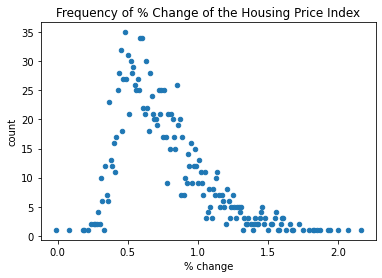

In [43]:
# ploting the dataframe
p_change_count.plot.scatter (x='% change', y='count', title= 'Frequency of % Change of the Housing Price Index') 

## Checking my work

I am starting to feel worried because the data is plotting strangely. I will be sorting the data by largest to smallest. Then I will pick the '% change' that is the most frequent and the least frequent. 

In [44]:
# here, I am sorting the data by largest to smallest.
p_change_count = p_change_count.sort_values(by='count',ascending= False)

In [45]:
# i have chosen to pull up the first 5 rows of the '% change' and 'count' columns. These are the top 5 % changes that happened the most. 
p_change_count[['% change','count']].head(5)

,% change,count
0,0.48,35
2,0.59,34
1,0.60,34
3,0.45,32
4,0.50,31


In [46]:
# i have chosen to pull up the last 5 rows of the '% change' and 'count' columns. These are the bottom 5 % changes that are less frequent. 
p_change_count[['% change','count']].tail(5)

,% change,count
132,1.67,1
131,1.79,1
130,0.18,1
129,2.00,1
153,1.57,1


In [47]:
# here, I am sorting the '% change' by smallest to largest
p_change_count = p_change_count.sort_values(by='% change',ascending= True)

In [48]:
# i have chosen to pull up the first 10 rows of the '% change' and 'count' columns. These are the top 5 % changes that should be the smallest.
p_change_count[['% change','count']].head(10)

,% change,count
136,-0.01,1
150,0.08,1
130,0.18,1
141,0.19,1
152,0.22,1
121,0.24,2
116,0.26,2
120,0.27,2
115,0.28,2
95,0.29,4


### So I have restarted the kernel for this one notebook so many times.

I think what was really messing up my data was having the number format for '% change' be in percent form with the percentage symbol. Once I reuploaded the data, changing the percent format to a general number format, it really _changed_ my life.

My next step is to be able to map the data, but I will need some guidance at office hours. 